In [56]:
!pip install -q numpy pandas seaborn matplotlib


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


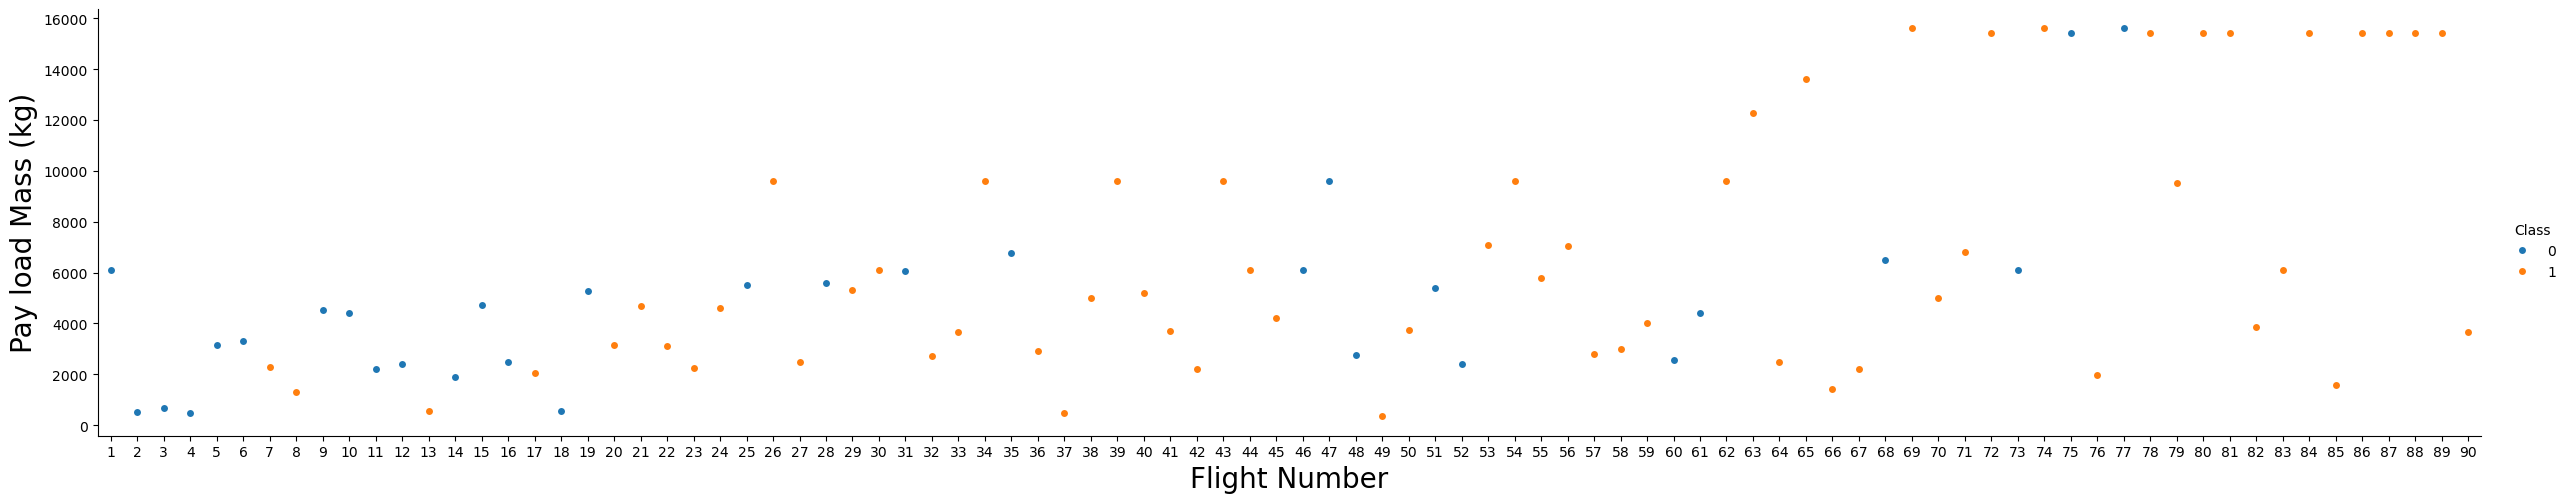

In [61]:
# Scatter plot of PayloadMass vs. FlightNumber
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.show()

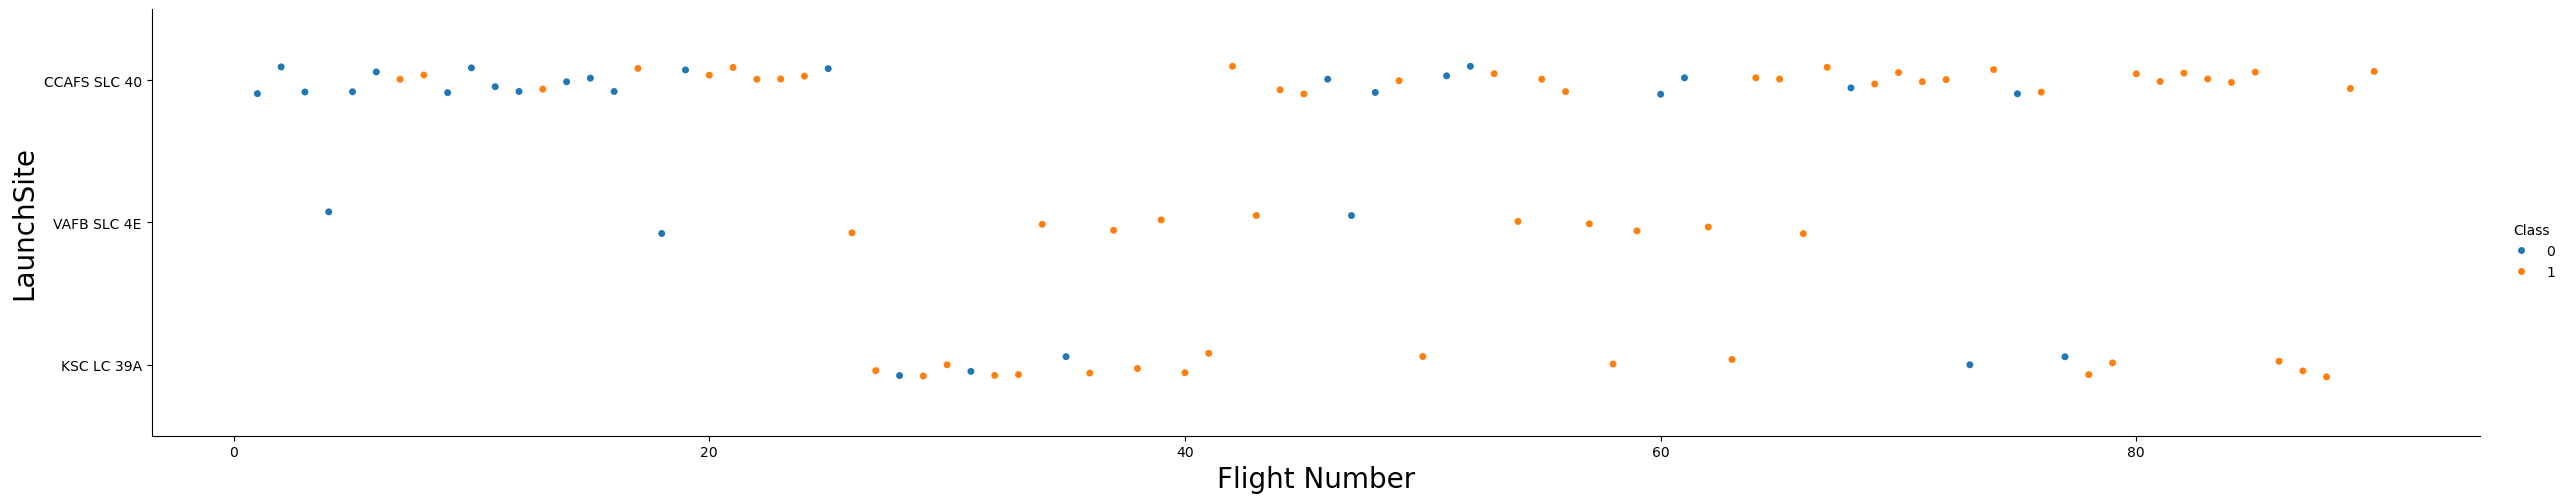

In [62]:
# Scatter plot of LaunchSite vs. FlightNumber
# hue is class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("LaunchSite", fontsize=20)
plt.show()

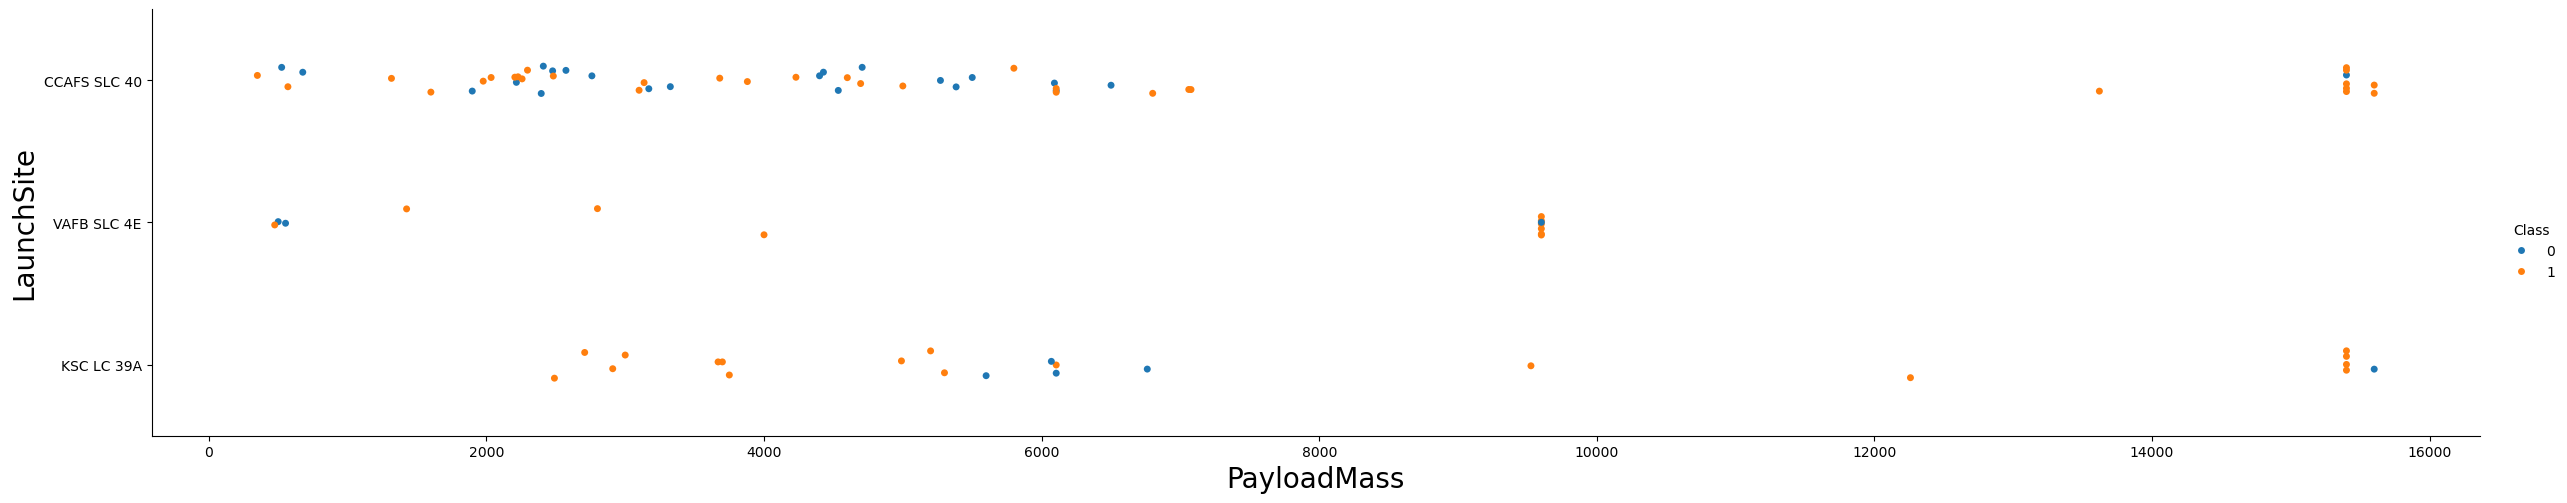

In [63]:
# Scatter plot of LaunchSite vs. PayloadMass
# hue is class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("PayloadMass", fontsize=20)
plt.ylabel("LaunchSite", fontsize=20)
plt.show()

In [64]:
# Group by 'Orbit' and calculate mean of 'Class'
orbit_success = df.groupby('Orbit')['Class'].mean()

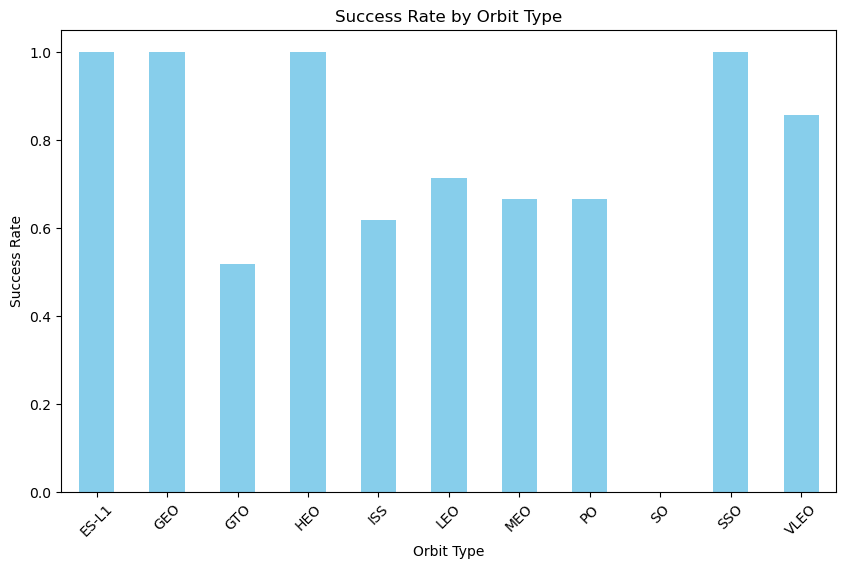

In [65]:
# Bar Chart of Success Rate vs. Orbit Type
plt.figure(figsize=(10, 6))
orbit_success.plot(kind='bar', color='skyblue')
plt.title("Success Rate by Orbit Type")
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.xticks(rotation=45)
plt.show()

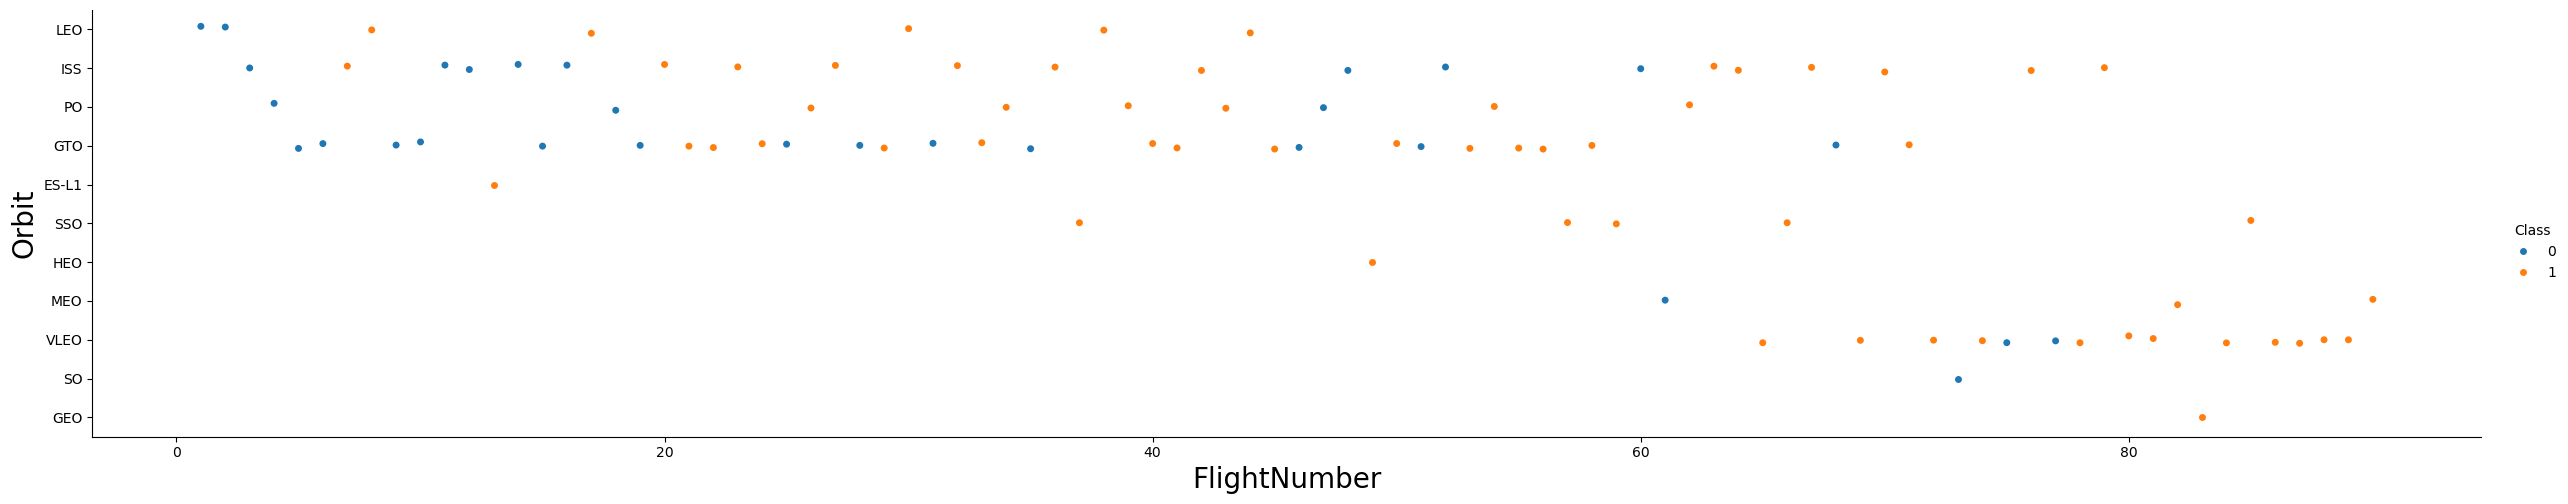

In [66]:
# Scatter plot of Orbit vs. FlightNumber
# hue is class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("FlightNumber", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

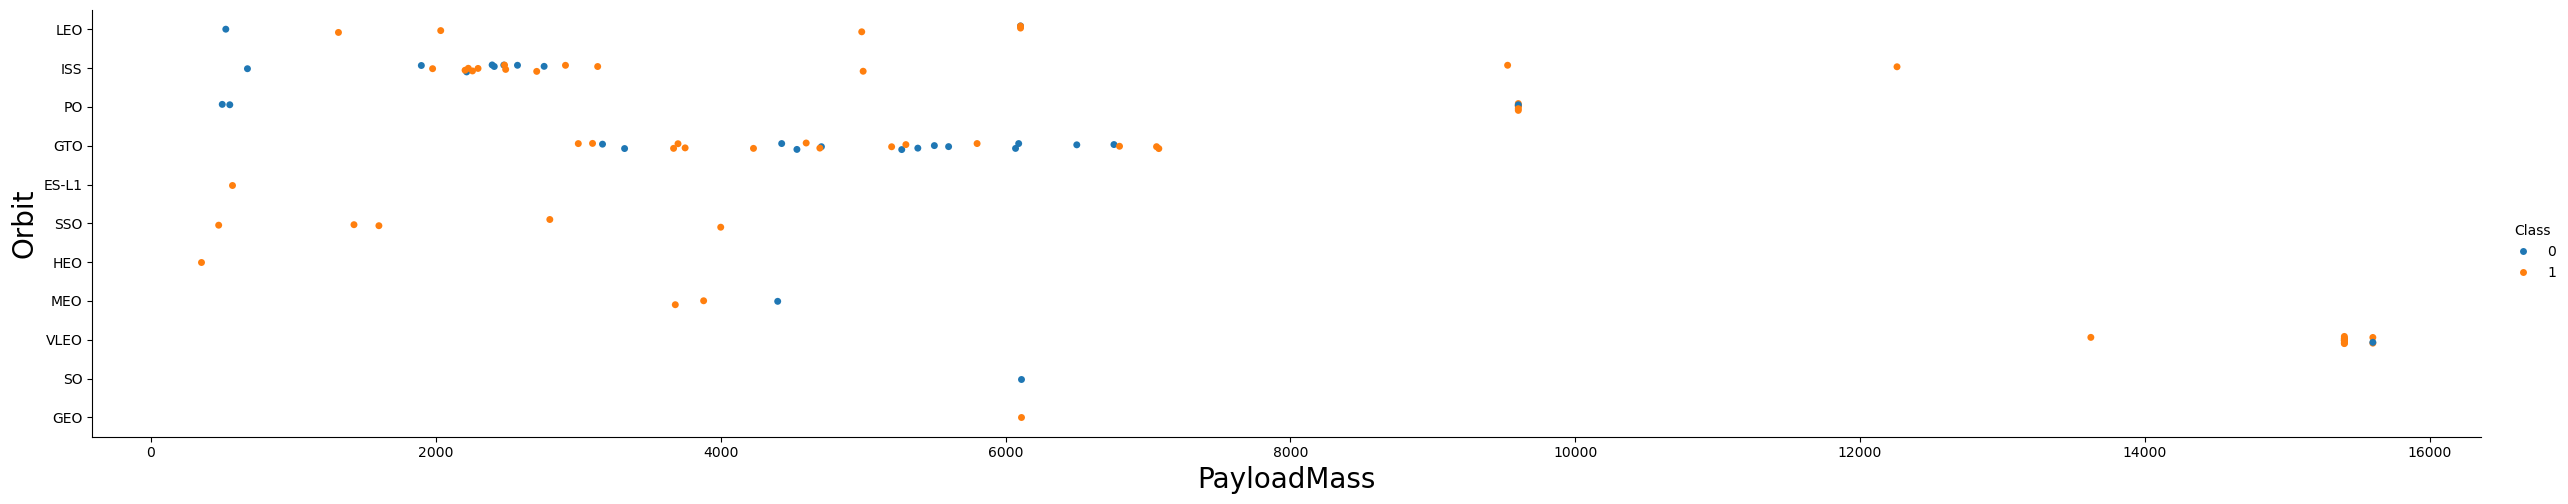

In [67]:
# Scatter plot of Orbit vs. PayloadMass
# hue is class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("PayloadMass", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

In [68]:
# A function to Extract years from the date
year = []
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


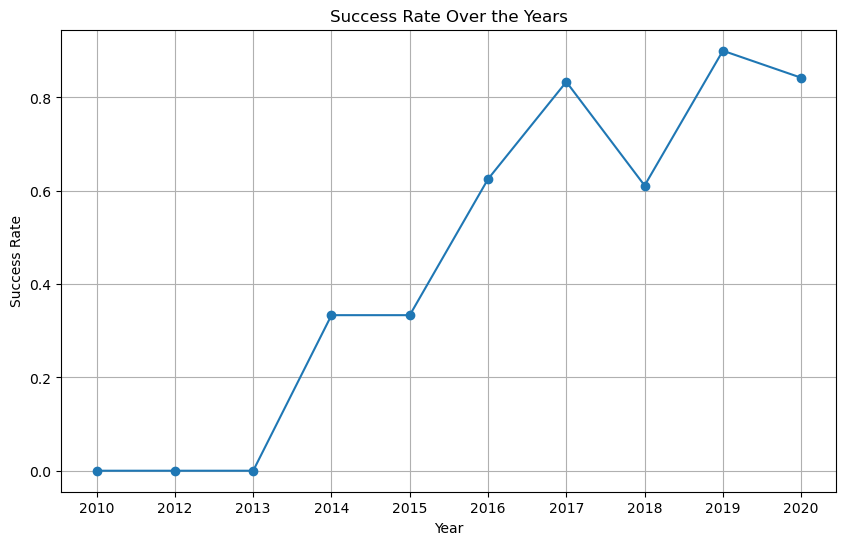

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [69]:
# Line chart of Success Rate vs. Year
yearly_success = df.groupby('Date')['Class'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_success.index, yearly_success.values, marker='o')
plt.title("Success Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.grid(True)
plt.show()

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [70]:
# One-hot encoding to the categorical columns
features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
